In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8


TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"


W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10


SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

KERAS_MODEL = "modeltest2.h5"
WORD2VEC_MODEL = "modeltest2.w2v"
TOKENIZER_MODEL = "tokenizertest2.pkl"
ENCODER_MODEL = "encodertest2.pkl"

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/training.1600000.processed.noemoticon.csv', encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [6]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df = df.sample(frac=1)

In [8]:
df.head(50)

,target,ids,date,flag,user,text
71876,0,1694078928,Mon May 04 00:59:40 PDT 2009,NO_QUERY,mangomara13,i didn't know u cud actually Lose Sleep over s...
865423,4,1677459253,Sat May 02 02:11:09 PDT 2009,NO_QUERY,SoSweetTT,Can't sleep... Watching episodes of House on H...
223874,0,1977295612,Sat May 30 20:37:13 PDT 2009,NO_QUERY,mrs_mcsupergirl,Sometime my twitter friends make me wish I was...
413971,0,2060714438,Sat Jun 06 19:26:10 PDT 2009,NO_QUERY,iAlex94,"gotten halfway, configuring my xchat menu, now..."
1386898,4,2052883103,Sat Jun 06 02:24:00 PDT 2009,NO_QUERY,raffyfrancisco,Dinner in Pasadena with High School friends......
1323129,4,2014867321,Wed Jun 03 02:57:05 PDT 2009,NO_QUERY,Rosalyne,"@Jamiebower: ...dear Sir, I do do love your ba..."
200391,0,1971656902,Sat May 30 07:36:11 PDT 2009,NO_QUERY,perthtones,@miss_peetie I can't skype from the studio un...
732722,0,2264132996,Sun Jun 21 02:53:32 PDT 2009,NO_QUERY,godannygo,So sickkk! Why is no medicine working!? I ain'...
500846,0,2186985874,Mon Jun 15 19:37:24 PDT 2009,NO_QUERY,BillRuffner,i miss home and living in columbus
130693,0,1835359892,Mon May 18 05:48:37 PDT 2009,NO_QUERY,SuzanaMarie,this is inpossible!!


In [9]:
print("Dataset size:", len(df))

Dataset size: 1600000


In [10]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [11]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

CPU times: user 378 ms, sys: 9.02 ms, total: 387 ms
Wall time: 394 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

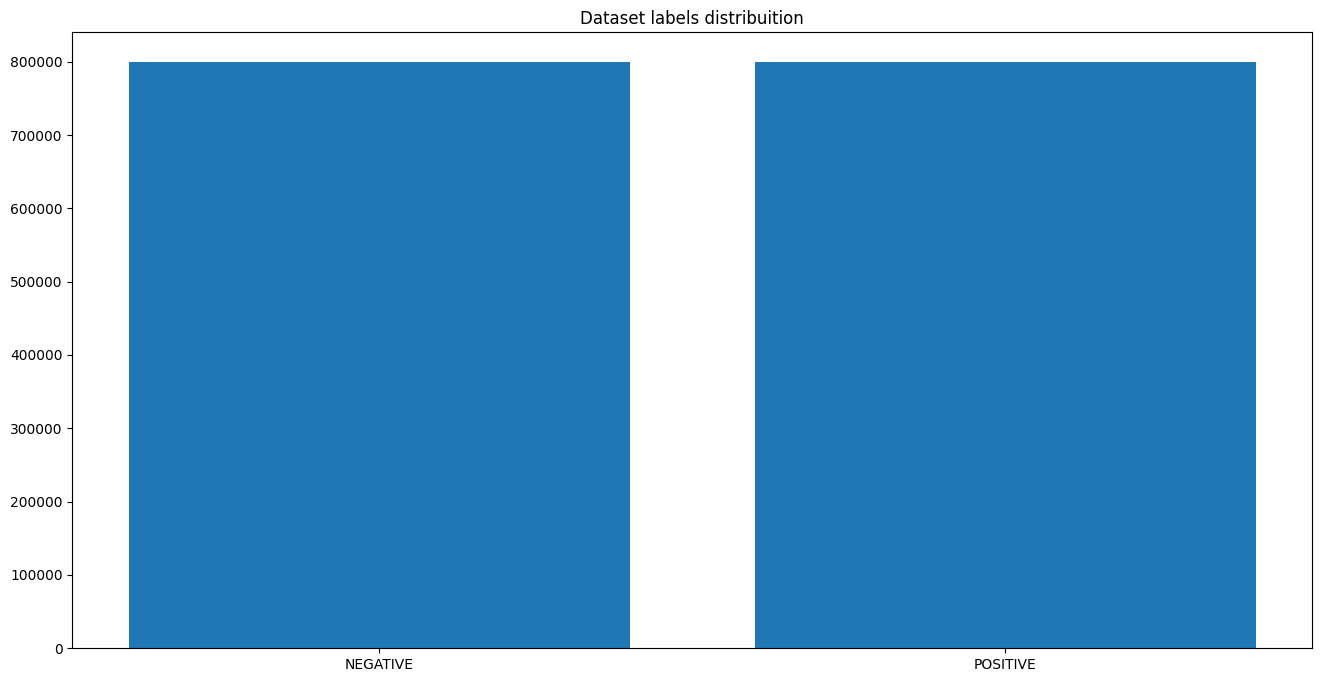

In [12]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [13]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [14]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [15]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

CPU times: user 53.1 s, sys: 209 ms, total: 53.3 s
Wall time: 53.6 s


In [16]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 1280000
TEST size: 320000


In [17]:
%%time
documents = [_text.split() for _text in df_train.text]

CPU times: user 3.3 s, sys: 293 ms, total: 3.6 s
Wall time: 3.6 s


In [18]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size=W2V_SIZE,
                                            window=W2V_WINDOW,
                                            min_count=W2V_MIN_COUNT,
                                            workers=8)

In [19]:
w2v_model.build_vocab(documents)

In [20]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 290616
CPU times: user 16.3 s, sys: 95 ms, total: 16.4 s
Wall time: 18.3 s


In [21]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

CPU times: user 23.8 s, sys: 510 ms, total: 24.4 s
Wall time: 25.7 s


In [22]:
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['NEGATIVE', 'POSITIVE', 'NEUTRAL']

In [23]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


In [24]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 300)
y_train (1280000, 1)

x_test (320000, 300)
y_test (320000, 1)


In [25]:
y_train[:10]

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1]])

In [26]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290616, 300)


In [27]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [28]:
from keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(vocab_size, 2, input_length=SEQUENCE_LENGTH))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 2)            581232    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1120      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 582,385
Trainable params: 582,385
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [30]:
history = model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
8000/8000 [==============================] - 2055s 256ms/step - loss: 0.4925 - accuracy: 0.7607 - val_loss: 0.4692 - val_accuracy: 0.7792
Epoch 2/6
8000/8000 [==============================] - 2068s 258ms/step - loss: 0.4581 - accuracy: 0.7865 - val_loss: 0.4890 - val_accuracy: 0.7648
Epoch 3/6
8000/8000 [==============================] - 2081s 260ms/step - loss: 0.4464 - accuracy: 0.7944 - val_loss: 0.4790 - val_accuracy: 0.7746
Epoch 4/6
8000/8000 [==============================] - 2085s 261ms/step - loss: 0.4245 - accuracy: 0.8079 - val_loss: 0.4793 - val_accuracy: 0.7751
Epoch 5/6
8000/8000 [==============================] - 2118s 265ms/step - loss: 0.4095 - accuracy: 0.8162 - val_loss: 0.4872 - val_accuracy: 0.7668
Epoch 6/6
8000/8000 [==============================] - 2088s 261ms/step - loss: 0.4005 - accuracy: 0.8202 - val_loss: 0.5069 - val_accuracy: 0.7671


In [32]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

313/313 [==============================] - 9s 30ms/step - loss: 0.5073 - accuracy: 0.7682

ACCURACY: 0.7681937217712402
LOSS: 0.5072503685951233
CPU times: user 9.44 s, sys: 301 ms, total: 9.74 s
Wall time: 10.7 s


In [33]:
def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

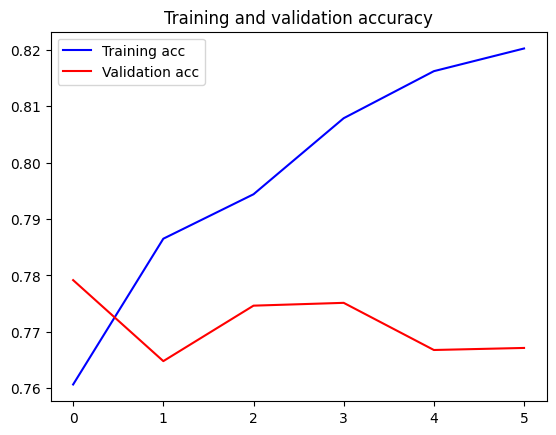

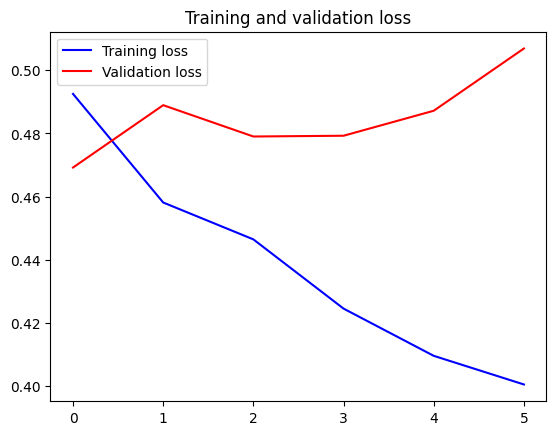

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
def decode_sentiment(score, include_neutral=True):
    if include_neutral:
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [36]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}

In [37]:
predict("Shit happens today")

1/1 [==============================] - 0s 171ms/step


{'label': 'NEGATIVE',
 'score': 0.3375582695007324,
 'elapsed_time': 0.21554136276245117}

In [38]:
predict("Today was my marriage aniversery and I proposed her again")

1/1 [==============================] - 0s 139ms/step


{'label': 'POSITIVE',
 'score': 0.9870448708534241,
 'elapsed_time': 0.21779179573059082}

In [39]:
predict("I was kicked by the hotel manager because I made other guest unhappy")

1/1 [==============================] - 0s 43ms/step


{'label': 'NEGATIVE',
 'score': 0.04854927957057953,
 'elapsed_time': 0.07855057716369629}

In [40]:
predict("She got pregnent because it was my fault . I dont want to be a father at this early age")

1/1 [==============================] - 0s 39ms/step


{'label': 'NEGATIVE',
 'score': 0.10528918355703354,
 'elapsed_time': 0.08156108856201172}

In [41]:
predict("Got luckey to get a family like mine to be supportive arround me always")

1/1 [==============================] - 0s 121ms/step


{'label': 'POSITIVE',
 'score': 0.8843143582344055,
 'elapsed_time': 0.2693033218383789}

In [42]:
predict("She said YES ")

1/1 [==============================] - 0s 61ms/step


{'label': 'POSITIVE',
 'score': 0.7906350493431091,
 'elapsed_time': 0.10763287544250488}

In [43]:
predict("PUBG is now banned in India")

1/1 [==============================] - 0s 131ms/step


{'label': 'NEGATIVE',
 'score': 0.16254423558712006,
 'elapsed_time': 0.27535176277160645}

In [44]:
%%time
y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

40/40 [==============================] - 1s 29ms/step
CPU times: user 2.09 s, sys: 330 ms, total: 2.42 s
Wall time: 2.32 s


In [45]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

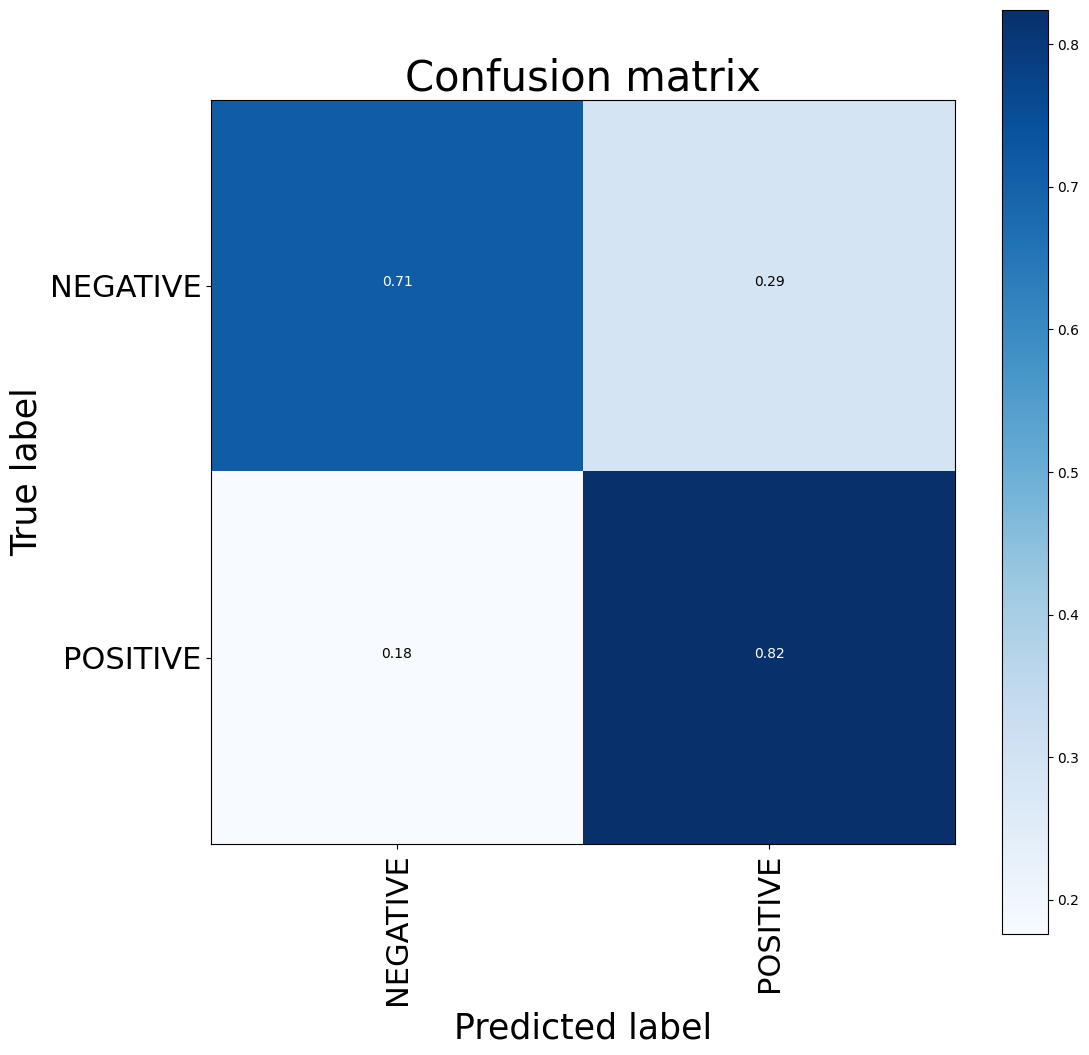

CPU times: user 1.99 s, sys: 289 ms, total: 2.28 s
Wall time: 2.06 s


In [46]:
%%time

cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()

In [47]:
print(classification_report(y_test_1d, y_pred_1d))

              precision    recall  f1-score   support

    NEGATIVE       0.80      0.71      0.75    159994
    POSITIVE       0.74      0.82      0.78    160006

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



In [48]:
accuracy_score(y_test_1d, y_pred_1d)

0.76819375

In [49]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)